In [2]:
import numpy as np
import pylab
import re

# cities in our weather data
CITIES = [
    'BOSTON',
    'SEATTLE',
    'SAN DIEGO',
    'PHILADELPHIA',
    'PHOENIX',
    'LAS VEGAS',
    'CHARLOTTE',
    'DALLAS',
    'BALTIMORE',
    'SAN JUAN',
    'LOS ANGELES',
    'MIAMI',
    'NEW ORLEANS',
    'ALBUQUERQUE',
    'PORTLAND',
    'SAN FRANCISCO',
    'TAMPA',
    'NEW YORK',
    'DETROIT',
    'ST LOUIS',
    'CHICAGO'
]

INTERVAL_1 = list(range(1961, 2006))
INTERVAL_2 = list(range(2006, 2016))

In [3]:
"""
Begin helper code
"""
class Climate(object):
    """
    The collection of temperature records loaded from 
    a given csv file
    """
    def __init__(self, filename):
        """
        Initialize a Climate instance, which stores the temperature records
        loaded from a given csv file specified by filename.

        Args:
            filename: name of the csv file (str)
        """
        self.rawdata = {}

        f = open(filename, 'r')
        header = f.readline().strip().split(',')
        for line in f:
            items = line.strip().split(',')

            date = re.match('(\d\d\d\d)(\d\d)(\d\d)', items[header.index('DATE')])
            year = int(date.group(1))
            month = int(date.group(2))
            day = int(date.group(3))

            city = items[header.index('CITY')]
            temperature = float(items[header.index('TEMP')])
            if city not in self.rawdata:
                self.rawdata[city] = {}
            if year not in self.rawdata[city]:
                self.rawdata[city][year] = {}
            if month not in self.rawdata[city][year]:
                self.rawdata[city][year][month] = {}
            self.rawdata[city][year][month][day] = temperature
            
        f.close()

    def get_yearly_temp(self, city, year):
        """
        Get the daily temperatures for the given year and city.

        Args:
            city: city name (str)
            year: the year to get the data for (int)

        Returns:
            a numpy 1-d array of daily temperatures for the specified year and
            city
        """
        temperatures = []
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        for month in range(1, 13):
            for day in range(1, 32):
                if day in self.rawdata[city][year][month]:
                    temperatures.append(self.rawdata[city][year][month][day])
        return np.array(temperatures)

    def get_daily_temp(self, city, month, day, year):
        """
        Get the daily temperature for the given city and time (year + date).

        Args:
            city: city name (str)
            month: the month to get the data for (int, where January = 1,
                December = 12)
            day: the day to get the data for (int, where 1st day of month = 1)
            year: the year to get the data for (int)

        Returns:
            a float of the daily temperature for the specified time (year +
            date) and city
        """
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        assert month in self.rawdata[city][year], "provided month is not available"
        assert day in self.rawdata[city][year][month], "provided day is not available"
        return self.rawdata[city][year][month][day]

"""
End helper code
"""

'\nEnd helper code\n'

## Problem 1: Model Fitting

Implement the `generate_models` function.

In [4]:
# Problem 1
def generate_models(x, y, degs):
    """
    Generate regression models by fitting a polynomial for each degree in degs
    to points (x, y).
    Args:
        x: a list with length N, representing the x-coords of N sample points
        y: a list with length N, representing the y-coords of N sample points
        degs: a list of degrees of the fitting polynomial
    Returns:
        a list of numpy arrays, where each array is a 1-d array of coefficients
        that minimizes the squared error of the fitting polynomial
    """
    x, y = np.array(x), np.array(y)
    coefs = []
    for deg in degs:
        coefs.append(np.polyfit(x, y, deg))
        
    return np.array(coefs, dtype=object)

In [9]:
X = np.array([1, 2])

In [10]:
X

array([1, 2])

In [16]:
print(generate_models([1961, 1962, 1963],[4.4,5.5,6.6],[1, 2]))

[array([ 1.1000e+00, -2.1527e+03])
 array([-8.86320608e-14,  1.10000000e+00, -2.15270000e+03])]


## Problem 2: R-squared

Implement the function `r_squared`.

$$
R^{2} = 1 - \dfrac{ \sum_{i} (y_{i} - p_{i})^{2} }{ \sum_{i} (y_{i} - \mu)^{2} }
$$


In [5]:
# Problem 2
def r_squared(y, estimated):
    """
    Calculate the R-squared error term.
    Args:
        y: list with length N, representing the y-coords of N sample points
        estimated: a list of values estimated by the regression model
    Returns:
        a float for the R-squared error term
    """
    error, variance, mean = 0, 0, (sum(y) / len(y))
    for i in range(len(y)):
        error += (y[i] - estimated[i]) ** 2
        variance += (y[i] - mean) ** 2
    
    return 1 - (error / variance)

In [18]:
y = [1, 2, 3]

In [19]:
sum(y)/len(y)

2.0

In [20]:
sum(y)

6

## Problem 3: Evaluating Models

Implement the function `evaluate_models_on_training`.


In [6]:
# Problem 3
def evaluate_models_on_training(x, y, models):
    """
    For each regression model, compute the R-square for this model with the
    standard error over slope of a linear regression line (only if the model is
    linear), and plot the data along with the best fit curve.

    For the plots, you should plot data points (x,y) as blue dots and your best
    fit curve (aka model) as a red solid line. You should also label the axes
    of this figure appropriately and have a title reporting the following
    information:
        degree of your regression model,
        R-square of your model evaluated on the given data points
    Args:
        x: a list of length N, representing the x-coords of N sample points
        y: a list of length N, representing the y-coords of N sample points
        models: a list containing the regression models you want to apply to
            your data. Each model is a numpy array storing the coefficients of
            a polynomial.
    Returns:
        None
    """
    best_model = [[], 0]  # Will store: model, at i=0; R-squared value at i=1
    for model in models:
        est_y = np.polyval(model, x)
        r2 = r_squared(y, est_y)
        if best_model[1] < r2:
            best_model = [model, r2]
    
    degree, r2 = (len(best_model[0]) - 1), best_model[1]
    
    pylab.plot(x, y, 'b.')
    pylab.plot(x, est_y, 'r-',
               label='Fit of degree = '+str(degree)+'; R2 = '+str(r2))
    pylab.legend(loc = 'best')
    pylab.xlabel("Year")
    pylab.ylabel("Temperature in C")
    pylab.title("Climate model of degree " + str(degree))
    pylab.show()

### Testing the functions

This code just randomly picks a day from a year (i.e., Jan 10th in this case), and sees whether we can find any trend in the temperature changing over the years.
We surmise, due to global warming, that the temperature of this specific date should increase over time.
This code generates your data samples; each sample represents a year from 1961 to 2005 (i.e., the years in INTERVAL_1) and the temperature of Jan 10th for Boston in that year (provided helper class is helpful for this).
The code fits your data to a linear line with generate_models and plots the regression results with evaluate_models_on_training. 

In [7]:
### Begining of program
raw_data = Climate('data.csv')

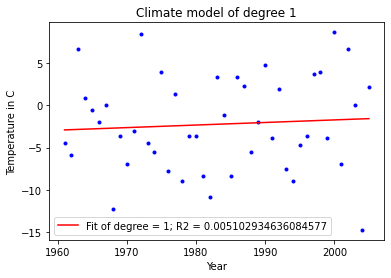

In [43]:
# Problem 3
y = []
x = INTERVAL_1
for year in INTERVAL_1:
    y.append(raw_data.get_daily_temp('BOSTON', 1, 10, year))
models = generate_models(x, y, [1])
evaluate_models_on_training(x, y, models)

## Problem 4: Exploring More Data

Let's try another way to get data points and see whether we can find some evidence for global warming. 
We surmise, due to global warming, the average temperature should increase over time.

In a similar manner to Problem 3, fill in the missing piece to the following code.
The code should generate your data samples.
Each sample represents a year from 1961 to 2005 and the average annual temperature in Boston in that year (again, the provided helper class is helpful).
Fit your data to a linear line with `generate_models` and plot the regression results with `evaluate_models_on_training`.

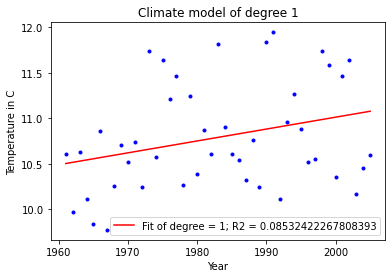

In [44]:
# Problem 4: FILL IN MISSING CODE TO GENERATE y VALUES
# Use the helper Class!
x1 = INTERVAL_1
x2 = INTERVAL_2
y = []

### MISSING LINES
for year in INTERVAL_1:
    y.append(np.mean(raw_data.get_yearly_temp('BOSTON', year)))
###

models = generate_models(x1, y, [1])    
evaluate_models_on_training(x1, y, models)

## Extra

Test the whole year range.

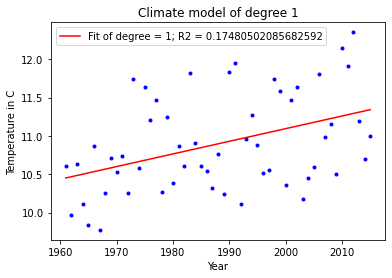

In [10]:
INTERVAL_WHOLE = list(range(1961, 2016))

x3 = INTERVAL_WHOLE
y = []

for year in INTERVAL_WHOLE:
    y.append(np.mean(raw_data.get_yearly_temp('BOSTON', year)))

models = generate_models(x3, y, [1])    
evaluate_models_on_training(x3, y, models)

Test more degrees.

/home/ale/.virtual-environments/data-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':
/home/ale/.virtual-environments/data-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


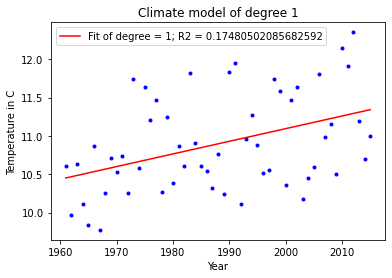

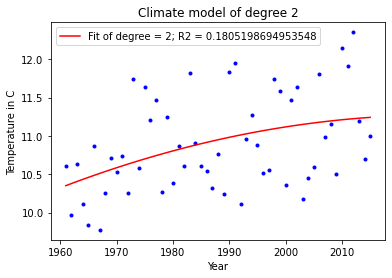

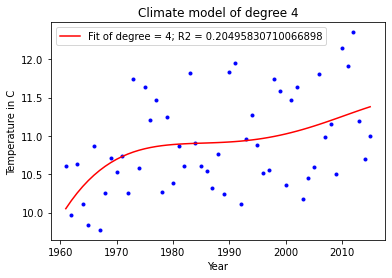

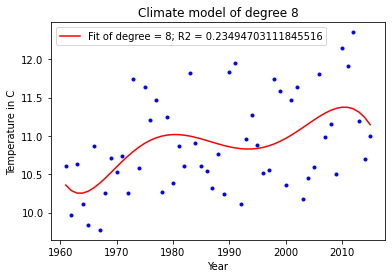

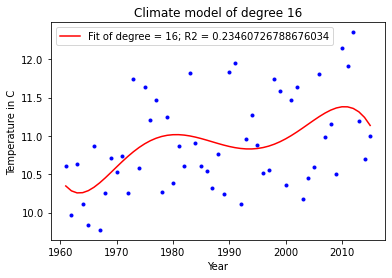

In [15]:
INTERVAL_WHOLE = list(range(1961, 2016))

x3 = INTERVAL_WHOLE
y = []

for year in INTERVAL_WHOLE:
    y.append(np.mean(raw_data.get_yearly_temp('BOSTON', year)))

models_1 = generate_models(x3, y, [1])
models_2 = generate_models(x3, y, [2])
models_4 = generate_models(x3, y, [4])
models_8 = generate_models(x3, y, [8])
models_16 = generate_models(x3, y, [16])
evaluate_models_on_training(x3, y, models_1)
evaluate_models_on_training(x3, y, models_2)
evaluate_models_on_training(x3, y, models_4)
evaluate_models_on_training(x3, y, models_8)
evaluate_models_on_training(x3, y, models_16)

/home/ale/.virtual-environments/data-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':
/home/ale/.virtual-environments/data-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':
/home/ale/.virtual-environments/data-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':
/home/ale/.virtual-environments/data-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':
/home/ale/.virtual-environments/data-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':
/home/ale/.virtual-environments/data-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may b

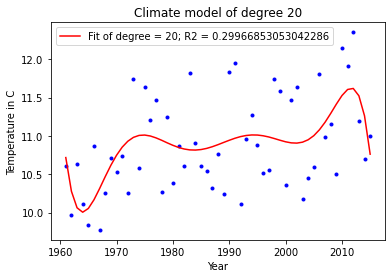

In [20]:
INTERVAL_WHOLE = list(range(1961, 2016))

x3 = INTERVAL_WHOLE
y = []

for year in INTERVAL_WHOLE:
    y.append(np.mean(raw_data.get_yearly_temp('BOSTON', year)))

models_various = generate_models(x3, y, range(1, 21))
evaluate_models_on_training(x3, y, models_various)